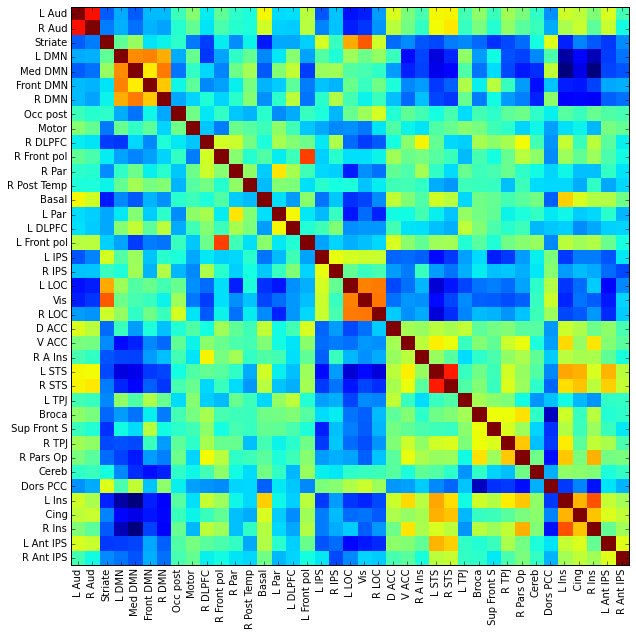

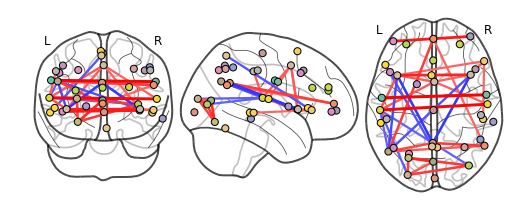

In [106]:
%matplotlib inline
import numpy as np
import pandas as pd
from nilearn import datasets
from nilearn.input_data import NiftiMapsMasker
from nilearn import plotting
from matplotlib import pyplot as plt
from nilearn import image

import networkx as nx
import louvain

"""
Use MDL probabilistic atlas to have regions of functional structures
https://team.inria.fr/parietal/research/spatial_patterns/spatial-patterns-in-resting-state/
References
----------
[1] Learning and comparing functional connectomes across subjects.
     Gaël Varoquaux, R.C. Craddock NeuroImage, 2013
"""

atlas = datasets.fetch_atlas_msdl()
atlas_img = atlas['maps']
labels = pd.read_csv(atlas['labels'])['name']

masker = NiftiMapsMasker(maps_img=atlas_img, standardize=True,
                           memory='/tmp/nilearn', verbose=0)

data = datasets.fetch_adhd(n_subjects=5)

# fit the data to the atlas mask, regress out confounds
time_series = masker.fit_transform(data.func[0], confounds=data.confounds[0])

correlation = np.corrcoef(time_series.T)

#plotting starts here
plt.figure(figsize=(10, 10))
plt.imshow(correlation, interpolation="nearest")
x_ticks = plt.xticks(range(len(labels)), labels, rotation=90)
y_ticks = plt.yticks(range(len(labels)), labels)


atlas_region_coords = [plotting.find_xyz_cut_coords(img) for img in image.iter_img(atlas_img)]
threshold = 0.5
plotting.plot_connectome(correlation, atlas_region_coords, edge_threshold=threshold)


In [107]:
#graph setup

#binarize correlation matrix
correlation[correlation<threshold] = 0
correlation[correlation != 0] = 1

graph = nx.from_numpy_matrix(correlation)

In [108]:
louvain.best_partition(graph)

{0: 0,
 1: 0,
 2: 1,
 3: 2,
 4: 2,
 5: 2,
 6: 2,
 7: 3,
 8: 4,
 9: 5,
 10: 6,
 11: 7,
 12: 8,
 13: 9,
 14: 10,
 15: 11,
 16: 6,
 17: 12,
 18: 13,
 19: 1,
 20: 1,
 21: 1,
 22: 14,
 23: 15,
 24: 16,
 25: 17,
 26: 17,
 27: 18,
 28: 19,
 29: 20,
 30: 17,
 31: 17,
 32: 21,
 33: 22,
 34: 17,
 35: 17,
 36: 17,
 37: 17,
 38: 23}